# Text detection using Amazon Rekognition

***
This notebook provides a walkthrough of the [text detection API](https://docs.aws.amazon.com/rekognition/latest/dg/text-detection.html) in Amazon Rekognition. You can quickly identify text in your video and image libraries to catalog footage and photos for marketing, advertising, and media industry use cases.
***

# Initialize stuff

In [ ]:
# Update boto3 to current version
!conda upgrade -y boto3

In [ ]:
#Check to ensure that current version of boto3 is installed
import boto3
print(boto3.__version__)

import botocore
print(botocore.__version__)

In [2]:
# Initialise Notebook
import boto3
from IPython.display import HTML, display, Image as IImage
from PIL import Image, ImageDraw, ImageFont
import time
import os

In [11]:
# Curent AWS Region. Use this to choose corresponding S3 bucket with sample content

mySession = boto3.session.Session()
awsRegion = "us-east-1"

In [12]:
# Init clients
rekognition = boto3.client('rekognition')
s3 = boto3.client('s3')

In [13]:
# S3 bucket that contains sample images and videos

# We are providing sample images and videos in this bucket so
# you do not have to manually download/upload test images and videos.
bucketName = "aws-rek-immersionday-" + awsRegion

In [14]:
# Create temporary directory
# This directory is not needed to call Rekognition APIs.
# We will only use this directory to download images from S3 bucket and draw bounding boxes

!mkdir m1tmp
tempFolder = 'm1tmp/'

mkdir: cannot create directory ‘m1tmp’: File exists


# Detect text in image
***

In [18]:
imagePath = "./static/aws-indonesia.png"

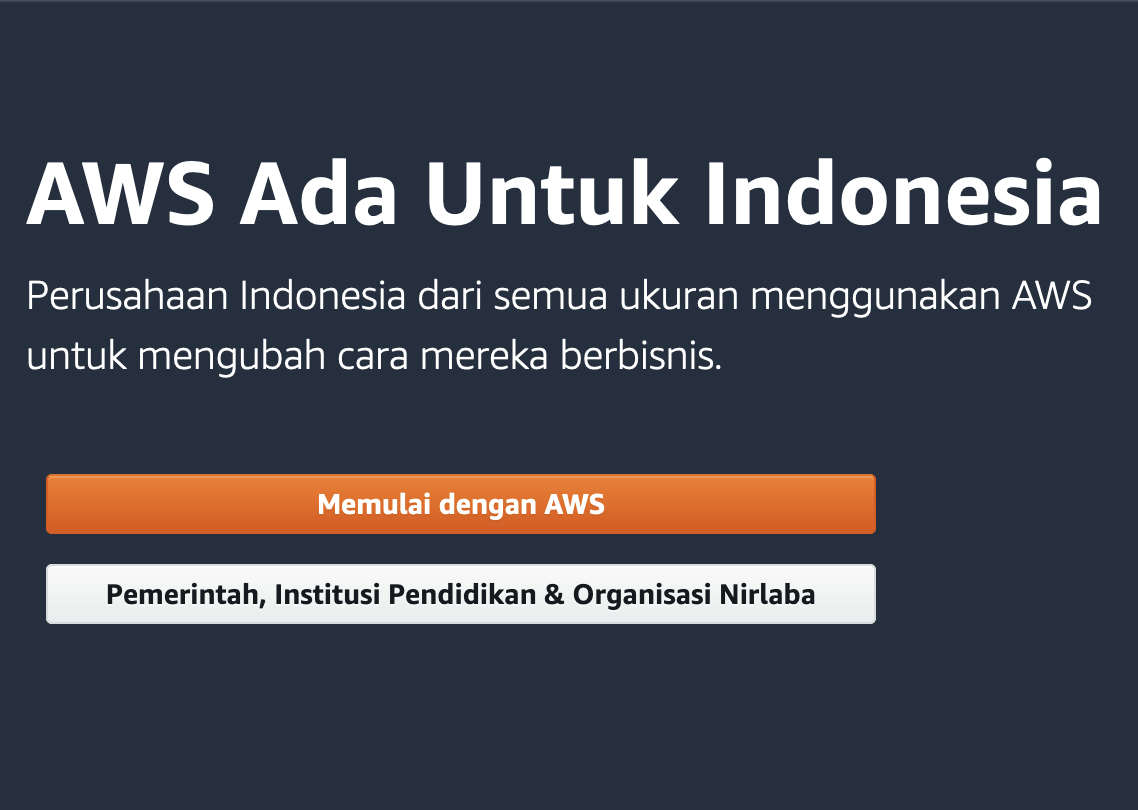

In [19]:
img=Image.open(imagePath)
display(img)

#### Call Rekognition to detect text in the image

In [21]:
# Call Amazon Rekognition to detect text in the image
# https://docs.aws.amazon.com/rekognition/latest/dg/API_DetectText.html
with open(imagePath, 'rb') as image:
    detectTextResponse = rekognition.detect_text(
    Image={
        'Bytes': image.read()
      },
      Filters={
        'WordFilter': {
            'MinConfidence': 90
        }
      }
    )

#### Review the raw JSON reponse from Rekognition

In [22]:
# Show JSON response returned by Rekognition Text API (Text Detection)
# In the JSON response below, you will see detected text, confidence score, and additional information.

display(detectTextResponse)

{'TextDetections': [{'DetectedText': 'AWS Ada Untuk Indonesia',
   'Type': 'LINE',
   'Id': 0,
   'Confidence': 100.0,
   'Geometry': {'BoundingBox': {'Width': 0.9461569786071777,
     'Height': 0.08966819196939468,
     'Left': 0.021472634747624397,
     'Top': 0.1912720501422882},
    'Polygon': [{'X': 0.021472634747624397, 'Y': 0.19209766387939453},
     {'X': 0.9675520658493042, 'Y': 0.1912720501422882},
     {'X': 0.967629611492157, 'Y': 0.28011462092399597},
     {'X': 0.021550163626670837, 'Y': 0.2809402346611023}]}},
  {'DetectedText': 'Perusahaan Indonesia dari semua ukuran menggunakan AWS',
   'Type': 'LINE',
   'Id': 1,
   'Confidence': 99.78753662109375,
   'Geometry': {'BoundingBox': {'Width': 0.9365367293357849,
     'Height': 0.05295587331056595,
     'Left': 0.02352828159928322,
     'Top': 0.340726763010025},
    'Polygon': [{'X': 0.02352828159928322, 'Y': 0.340726763010025},
     {'X': 0.9600650072097778, 'Y': 0.340726763010025},
     {'X': 0.9600650072097778, 'Y': 0.

#### Display list of line detected

In [34]:
for textDetection in detectTextResponse["TextDetections"]:
    if textDetection["Type"]=="LINE":
        print(textDetection["DetectedText"])

AWS Ada Untuk Indonesia
Perusahaan Indonesia dari semua ukuran menggunakan AWS
untuk mengubah cara mereka berbisnis.
Memulai dengan AWS
Pemerintah, Institusi Pendidikan & Organisasi Nirlaba


# Detect text in image using Filters and Regions of Interest
***

In [ ]:
imageName = "media/text-detection/coffee.jpg"

In [ ]:
display(IImage(url=s3.generate_presigned_url('get_object', Params={'Bucket': bucketName, 'Key': imageName})))

In [46]:
# Call Amazon Rekognition to detect text in the image
# https://docs.aws.amazon.com/rekognition/latest/dg/API_DetectText.html
with open(imagePath, 'rb') as image:
    detectTextResponse = rekognition.detect_text(
        Image={
            'Bytes': image.read()
          },
        Filters={
            'WordFilter': {
                'MinConfidence': 90,
                'MinBoundingBoxHeight': 0.05,
                'MinBoundingBoxWidth': 0.02
            },
            'RegionsOfInterest': [
                {
                    'BoundingBox': {
                        'Width': 0.9461569786071777,
                        'Height': 0.08966819196939468,
                        'Left': 0.021472634747624397,
                        'Top': 0.1912720501422882},
                },
            ]
        }
    )

In [47]:
# Show JSON response returned by Rekognition Text API (Text Detection)
# In the JSON response below, you will see detected text, confidence score, and additional information.

display(detectTextResponse)

{'TextDetections': [{'DetectedText': 'AWS Ada Untuk Indonesia',
   'Type': 'LINE',
   'Id': 0,
   'Confidence': 100.0,
   'Geometry': {'BoundingBox': {'Width': 0.9461569786071777,
     'Height': 0.08966819196939468,
     'Left': 0.021472634747624397,
     'Top': 0.1912720501422882},
    'Polygon': [{'X': 0.021472634747624397, 'Y': 0.19209766387939453},
     {'X': 0.9675520658493042, 'Y': 0.1912720501422882},
     {'X': 0.967629611492157, 'Y': 0.28011462092399597},
     {'X': 0.021550163626670837, 'Y': 0.2809402346611023}]}},
  {'DetectedText': 'AWS',
   'Type': 'WORD',
   'Id': 1,
   'ParentId': 0,
   'Confidence': 100.0,
   'Geometry': {'BoundingBox': {'Width': 0.16543209552764893,
     'Height': 0.0810546875,
     'Left': 0.02154787816107273,
     'Top': 0.197265625},
    'Polygon': [{'X': 0.02154787816107273, 'Y': 0.197265625},
     {'X': 0.1869799643754959, 'Y': 0.197265625},
     {'X': 0.1869799643754959, 'Y': 0.2783203125},
     {'X': 0.02154787816107273, 'Y': 0.2783203125}]}},
 

In [48]:
for textDetection in detectTextResponse["TextDetections"]:
    text = textDetection["DetectedText"]
    if(textDetection["Type"] == "WORD"):
        print("Word: {}".format(textDetection["DetectedText"]))

Word: AWS
Word: Ada
Word: Untuk
Word: Indonesia


# Detect text in video
 Text detection in video is an async operation. 
https://docs.aws.amazon.com/rekognition/latest/dg/text-detecting-video-procedure.html.

- First we start a text detection job which returns a Job Id.
- We can then call `get_text_detection` to get the job status and after job is complete, we can get object metadata.
- In production use cases, you would usually use StepFunction or SNS topic to get notified when job is complete.
***

In [ ]:
videoName = "media/text-detection/serverless-bytes.mov"

#### Call Rekognition to start a job for text detection

In [ ]:
# Start video text job
startTextDetection = rekognition.start_text_detection(
    Video={
        'S3Object': {
            'Bucket': bucketName,
            'Name': videoName,
        }
    },
)

textJobId = startTextDetection['JobId']
display("Job Id: {0}".format(textJobId))

#### Wait for text detection job to complete

In [ ]:
# Wait for text detection job to complete
# In production use cases, you would usually use StepFunction or SNS topic to get notified when job is complete.
getTextDetection = rekognition.get_text_detection(
    JobId=textJobId
)

while(getTextDetection['JobStatus'] == 'IN_PROGRESS'):
    time.sleep(5)
    print('.', end='')
 
    getTextDetection = rekognition.get_text_detection(
    JobId=textJobId
    )
    
display(getTextDetection['JobStatus'])

#### Review raw JSON reponse from Rekognition

In [ ]:
# Show JSON response returned by Rekognition Text Detection API
# In the JSON response below, you will see list of detected text.
# For each detected object, you will see information like Timestamp

display(getTextDetection)

#### Display recognized text in the video

In [ ]:
flaggedTextInVideo = ["AWS", "Twitter"]

theLines = {}

# Display timestamps and objects detected at that time
strDetail = "Text detected in video<br>=======================================<br>"
strOverall = "Text in the overall video:<br>=======================================<br>"

# Objects detected in each frame
for obj in getTextDetection['TextDetections']:
    if(obj['TextDetection']['Type'] == 'WORD'):
        ts = obj ["Timestamp"]
        cconfidence = obj['TextDetection']["Confidence"]
        oname = obj['TextDetection']["DetectedText"]

        if(oname in flaggedTextInVideo):
            print("Found flagged text at {} ms: {} (Confidence: {})".format(ts, oname, round(cconfidence,2)))

        strDetail = strDetail + "At {} ms: {} (Confidence: {})<br>".format(ts, oname, round(cconfidence,2))
        if oname in theLines:
            cojb = theLines[oname]
            theLines[oname] = {"Text" : oname, "Count": 1+cojb["Count"]}
        else:
            theLines[oname] = {"Text" : oname, "Count": 1}

# Unique objects detected in video
for theLine in theLines:
    strOverall = strOverall + "Name: {}, Count: {}<br>".format(theLine, theLines[theLine]["Count"])

# Display results
display(HTML(strOverall))

#### Show video in the player

In [ ]:
# Show video in a player

s3VideoUrl = s3.generate_presigned_url('get_object', Params={'Bucket': bucketName, 'Key': videoName})

videoTag = "<video controls='controls' autoplay width='640' height='360' name='Video' src='{0}'></video>".format(s3VideoUrl)

videoui = "<table><tr><td style='vertical-align: top'>{}</td></tr></table>".format(videoTag)

display(HTML(videoui))

In [ ]:
listui = "<table><tr><td style='vertical-align: top'>{}</td></tr></table>".format(strDetail)
display(HTML(listui))

***
### References
- https://docs.aws.amazon.com/rekognition/latest/dg/API_DetectText.html
- https://docs.aws.amazon.com/rekognition/latest/dg/API_StartTextDetection.html
- https://docs.aws.amazon.com/rekognition/latest/dg/API_GetTextDetection.html

***

You have successfully used Amazon Rekognition to identify text in images an videos.